Test Script for testing loading of the data

In [104]:
#Loading necessary libraries
import os
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from PIL import Image
import numpy as np
from torchvision.io import read_image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [105]:
#Loading Image Names for Stop and Non-Stop Images
stop_image_dir = "./Data/stop/"
not_stop_image_dir = "./Data/not_stop/"
stop_image_list =  os.listdir(stop_image_dir)
not_stop_image_list =  os.listdir(not_stop_image_dir)

In [106]:
#Find distribution of widths and heights
n_images = len(stop_image_list) + len(not_stop_image_list)
width_distr = np.zeros(n_images)
heigth_distr = np.zeros(n_images)

#Iterate Over Images
for i in range(len(stop_image_list)):
    stop_image_name = stop_image_list[i]
    temp_image = Image.open(stop_image_dir + stop_image_name)
    width_distr[i] = temp_image.width
    heigth_distr[i] = temp_image.height

for i in range(len(not_stop_image_list)):
    not_stop_image_name = not_stop_image_list[i]
    temp_image = Image.open(not_stop_image_dir + not_stop_image_name)
    width_distr[i+len(stop_image_list)] = temp_image.width
    heigth_distr[i+len(stop_image_list)] = temp_image.height

#Calculating means as target widths and heights
reshape_width = np.round_(np.mean(width_distr)).astype(int)
reshape_heigth = np.round_(np.mean(heigth_distr)).astype(int)


In [107]:
#Creating Custom DataSet
class stopNotStopData(Dataset):
    def __init__(self, stop_dir, not_stop_dir, transform=None):
        self.stop_dir = stop_dir
        self.not_stop_dir = not_stop_dir

        #Finding Number of Stop and Non-Stop Images
        self.stop_image_list =  os.listdir(stop_image_dir)
        self.not_stop_image_list =  os.listdir(not_stop_image_dir)
        self.n_stop_images = len(self.stop_image_list)
        self.n_not_stop_images = len(self.not_stop_image_list)
        self.n_images = self.n_not_stop_images + self.n_stop_images

        #Creating initial labels for images
        self.labels = np.zeros(self.n_images)

        self.transform = transform

    def __len__(self):
        return self.n_images

    def __getitem__(self, idx):
        #First find the corresponding image
        if idx+1<=self.n_stop_images:
            image_name = self.stop_image_list[idx]
            image_path = os.path.join(self.stop_dir, image_name)
            #Image is a stop image first load it
            #image = Image.open(self.stop_dir+str(int(idx+1))+".JPG")
            image = Image.open(image_path).convert('RGB')
            image = image.resize((reshape_width, reshape_heigth), resample=Image.BICUBIC)
            #image = np.asarray(image).astype(np.uint8)
            label = 0 # 0 is for stop image and 1 is for non-stop image
            self.labels[i] = 0 #Set it also in labels array
            if self.transform:
                image = self.transform(image)
            label = torch.tensor(label)
        else:
            idx = idx - self.n_stop_images
            image_name = self.not_stop_image_list[idx]
            image_path = os.path.join(self.not_stop_dir, image_name)
            #image = read_image(self.not_stop_dir+str(int(idx+1))+".JPG")
            #image = Image.open(self.not_stop_dir+str(int(idx+1))+".JPG")
            image = Image.open(image_path).convert('RGB')
            image = image.resize((reshape_width, reshape_heigth), resample=Image.BICUBIC)
            #image = np.asarray(image).astype(np.uint8)
            label = 1 # 0 is for stop image and 1 is for non-stop image
            self.labels[i] = 1 #Set it also in labels array
            if self.transform:
                image = self.transform(image)
            label = torch.tensor(label)

        return image, label



In [108]:
trans = transforms.ToTensor()
label = 1
label_out = trans(label)
print(label_out)

TypeError: pic should be PIL Image or ndarray. Got <class 'int'>

In [ ]:
#Test of Splitting DataSet into train, validation and test
#Define Transformation on Image
#image_transform = transforms.Compose([transforms.Resize(size=(reshape_width, reshape_heigth)), transforms.ToTensor()])
image_transform = transforms.ToTensor()
#Create DataSet object
full_data_set = stopNotStopData(stop_dir=stop_image_dir, not_stop_dir=not_stop_image_dir, transform=image_transform)

#First Find Number of Elements of each dataset
num_elements = np.round_([len(full_data_set)*0.8, len(full_data_set)*0.1, len(full_data_set)*0.1]).astype(int)
num_elements[0] = num_elements[0] - (np.sum(num_elements)-len(full_data_set))
#Split dataset into three parts
train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(full_data_set, num_elements, generator=torch.Generator().manual_seed(75))


(946, 1300, 4)


[]

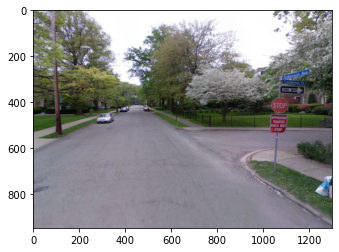

In [ ]:
idx = 45
image_name = stop_image_list[idx]
image_path = os.path.join(stop_image_dir, image_name)
image = Image.open(image_path)
image = image.resize((reshape_width, reshape_heigth), resample=Image.BICUBIC)
image_arr = np.asarray(image)
print(image_arr.shape)

plt.imshow(image)
plt.plot()

0
torch.Size([946, 1300, 3])


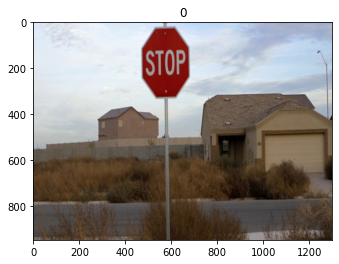

1
torch.Size([946, 1300, 3])


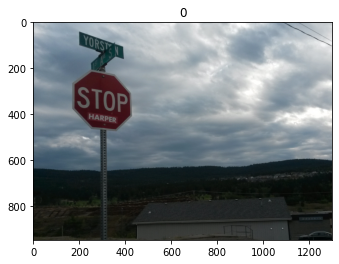

2
torch.Size([946, 1300, 3])


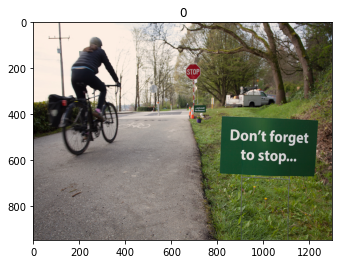

3
torch.Size([946, 1300, 3])


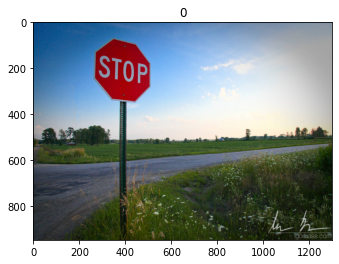

4
torch.Size([946, 1300, 3])


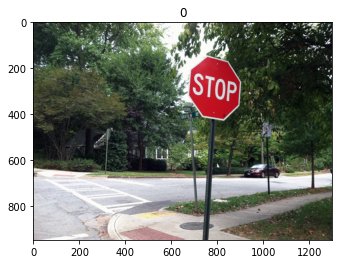

5
torch.Size([946, 1300, 3])
6
torch.Size([946, 1300, 3])
7
torch.Size([946, 1300, 3])
8
torch.Size([946, 1300, 3])
9
torch.Size([946, 1300, 3])
10
torch.Size([946, 1300, 3])
11
torch.Size([946, 1300, 3])
12
torch.Size([946, 1300, 3])
13
torch.Size([946, 1300, 3])
14
torch.Size([946, 1300, 3])
15
torch.Size([946, 1300, 3])
16
torch.Size([946, 1300, 3])
17
torch.Size([946, 1300, 3])
18
torch.Size([946, 1300, 3])
19
torch.Size([946, 1300, 3])
20
torch.Size([946, 1300, 3])
21
torch.Size([946, 1300, 3])
22
torch.Size([946, 1300, 3])
23
torch.Size([946, 1300, 3])
24
torch.Size([946, 1300, 3])
25
torch.Size([946, 1300, 3])
26
torch.Size([946, 1300, 3])
27
torch.Size([946, 1300, 3])
28
torch.Size([946, 1300, 3])
29
torch.Size([946, 1300, 3])
30
torch.Size([946, 1300, 3])
31
torch.Size([946, 1300, 3])
32
torch.Size([946, 1300, 3])
33
torch.Size([946, 1300, 3])
34
torch.Size([946, 1300, 3])
35
torch.Size([946, 1300, 3])
36
torch.Size([946, 1300, 3])
37
torch.Size([946, 1300, 3])
38
torch.Size([

In [ ]:
import matplotlib.pyplot as plt


for i in range(len(full_data_set)):
    print(i)
    x, y = full_data_set[i]
    x = torch.movedim(x, 0, -1)
    #train_x = np.asarray(train_x*255).astype(np.uint8)
    print(x.shape)
    if i < 5:
        plt.imshow(x)
        plt.title(str(y))
        plt.show()

In [ ]:
#Test of the training part for basic structure
class tevfik_nn(nn.Module):
    #Constructor
    def __init__(self, out_channel_1 = 16, out_channel_2 = 32):
        super(tevfik_nn, self).__init__()
        self.out_channel_1 = out_channel_1
        self.out_channel_2 = out_channel_2
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=self.out_channel_1, kernel_size=5, padding=3, stride=2)
        self.maxpool1 = nn.MaxPool2d(kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=self.out_channel_1, out_channels=self.out_channel_2, kernel_size=3, padding=1, stride=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=3)

        self.linear1 = nn.Linear(out_channel_2*43*31, 1024)
        self.linear2 = nn.Linear(1024, 1)

        
    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        x = torch.sigmoid(x)
        return x

#Device Selection
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

device = "cpu"
print(device)

#model = tevfik_nn(out_channel_1=8, out_channel_2=16).to(device)
#x_test = torch.rand(3, 1300, 946, device=device)
#y_yest = model(x_test)

cpu


In [122]:
#Test of writing function to train model
# Model Training Function
def train_model(model, n_epochs, train_loader, validation_loader, optimizer, criterion, N_test):
    cost_list = []
    accuracy_list = []
    # Loops for each epoch
    for epoch in range(n_epochs):
        # Keeps track of cost for each epoch
        COST=0
        # For each batch in train loader
        for x, y in train_loader:
            print(x.shape)
            x = x.to(device)
            y = y.unsqueeze(1)
            y = y.to(device)
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction based on X value
            z = model(x)
            # Measures the loss between prediction and acutal Y value
            z = z.to(torch.float32)
            y = y.to(torch.float32)
            loss = criterion(z, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()
            # Cumulates loss 
            COST+=loss.data
        
        # Saves cost of training data of epoch
        cost_list.append(COST)
        # Keeps track of correct predictions
        correct=0
        N_test = 0
        # Perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            y_test = y_test.to(device)
            x_test = x_test.to(device)
            # Makes a prediction
            z = model(x_test)

            #Make prediction and compare with actual result
            predict = (z > 0.5)
            predict = torch.squeeze(predict.long())
            # Checks if the prediction matches the actual value
            correct += (predict == y_test).sum().item()
            N_test += len(predict)
        
        # Calcualtes accuracy and saves it
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
        print('Epoch' + str(epoch+1) + 'Finished!')
    return model, cost_list, accuracy_list

torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([13, 3, 946, 1300])
Epoch1Finished!
torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([16, 3, 946, 1300])
torch.Size([13, 3, 946, 1300])
Epoch2Finished!


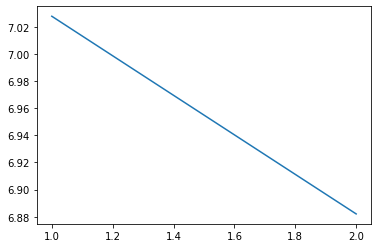

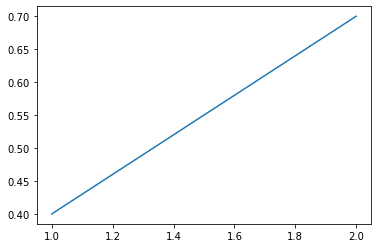

In [123]:
import matplotlib.pyplot as plt

#Test part of the model
model = tevfik_nn(out_channel_1=8, out_channel_2=16).to(device)
n_epochs = 2

# We create a criterion which will measure loss
criterion = nn.BCELoss()
learning_rate = 0.1
# Create an optimizer that updates model parameters using the learning rate and gradient
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#Creating DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=16 ,shuffle=True)
valid_dataloader = DataLoader(dataset=valid_dataset, batch_size=len(valid_dataset), shuffle=True)
N_test = len(valid_dataset)

#Training the model
model, cost_list, accuracy_list = train_model(model=model, n_epochs=n_epochs, train_loader=train_dataloader, validation_loader=valid_dataloader, optimizer=optimizer, criterion=criterion, N_test=0)

plt.plot(range(1,n_epochs+1), cost_list)
plt.show()

plt.plot(range(1,n_epochs+1), accuracy_list)
plt.show()

In [119]:
correct = 0
N_test = 0
for x_test, y_test in valid_dataloader:
    y_test = y_test.to(device)
    x_test = x_test.to(device)
    # Makes a prediction
    z = model(x_test)

    #Make prediction and compare with actual result
    predict = (z > 0.5)
    predict = torch.squeeze(predict.long())
    # Checks if the prediction matches the actual value
    correct += (predict == y_test).sum().item()
    N_test += len(predict)
    print(y_valid.shape)
print(correct)

torch.Size([20])
10


In [121]:
print(predict)
print(y_test)

tensor([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])
tensor([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0])


In [ ]:
predict = (result > 0.5)
predict = torch.squeeze(predict.long())

correct = (predict == y_valid).sum().item()
print(y_valid.shape)
print(predict.shape)
print(correct/len(predict))

torch.Size([20])
torch.Size([20])
0.75


In [ ]:
#Test can it be transferrable to dataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32 ,shuffle=True)
valid_dataloader = DataLoader(dataset=valid_dataset, batch_size=len(valid_dataset), shuffle=True)

train_features, train_labels = next(iter(train_dataloader))
print(len(train_labels))

In [ ]:
#Test of Convolution and max pooling
conv_test = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=3, stride=2)
pooling = nn.MaxPool2d(kernel_size=5)

test_idx = 5
test_x = train_features[test_idx]

print(test_x.shape)

aft_conv1 = conv_test(test_x)
print(type(aft_conv1))
print(aft_conv1.shape)

aft_pool = pooling(aft_conv1)
print(aft_pool.shape)

conv_2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1, stride=1)
aft_conv2 = conv_2(aft_pool)
pool_2 = nn.MaxPool2d(kernel_size=3)
final = pool_2(aft_conv2)
print(final.shape)
final = torch.flatten(final)
print(final.shape)


In [ ]:
import matplotlib.pyplot as plt
from random import randrange

idx = randrange(32)

#Load the Data
data = train_features[idx]
[rgb, n_y, n_x] = data.shape

image = np.zeros([n_y, n_x ,rgb])
for i in range(rgb):
    image[:,:,i] = data[i][:][:]

plt.figure(figsize=(8,8))
plt.imshow(image)
plt.title(str(train_labels[idx]))
plt.show()
print(image.shape)

In [ ]:
print(reshape_width)
print(reshape_heigth)